In [1]:
import json
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display
import os

# An optional utility to display a progress bar
# for long-running loops. `pip install tqdm`.
from tqdm import tqdm
#import atomate2.common.schemas.symmetry as acss
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol.pymatgen import quick_view

mpr = MPRester(api_key="XLgeaWrG6lipMAIH")

data = []

entrie = mpr.query("mp-924128", ["material_id", "cif"])
data.extend(entrie)

# Télécharger le fichier .cif

In [2]:
if not os.path.exists('lmapr1492_cifs'):
    os.mkdir('lmapr1492_cifs')

for d in tqdm(data):
    with open("lmapr1492_cifs/{}.cif".format(d["material_id"]), 'w') as f:
        f.write(d["cif"])

100%|██████████| 1/1 [00:00<00:00, 106.82it/s]


# Étude du diffractogramme

Nous devons déterminer les 3 premiers pics du diffractogramme correspondant à notre crystal (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å. 

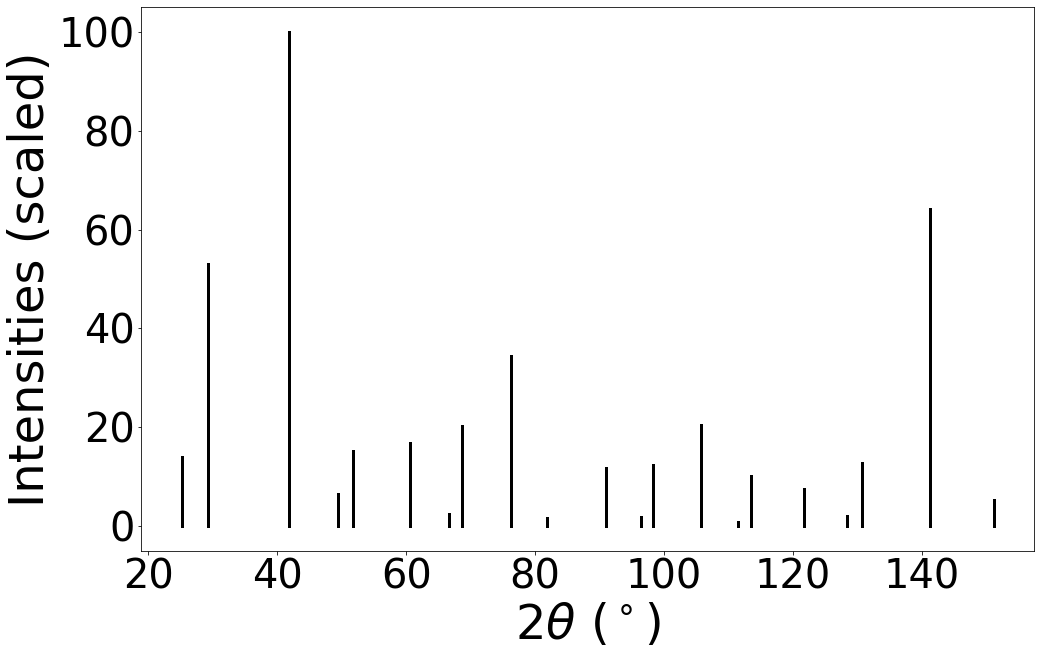

In [7]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator

structure = mpr.get_structure_by_material_id("mp-924128")
xrd = XRDCalculator(wavelength='CuKa')
pattern = xrd.get_pattern(structure)

#Diffractogramme pour un intervalle [0, pi] pour 2Theta
xrd.show_plot(structure, annotate_peaks=False, two_theta_range=[0,180])

# Analyse des trois premiers pics

In [11]:
pic = ["Premier pic" , "Deuxième pic","Troisième pic"]

for i in range(3):
    print('------', pic[i], '------')
    print("Angle 2Theta [°] = ", pattern.x[i])
    print("Intensité [%] = ", pattern.y[i])
    print("Indices hkl [-]: ", pattern.hkls[i], '\n')

------ Premier pic ------
Angle 2 theta [°] =  25.22744643179948
Intensité [%] =  14.070291153206977
Indices hkl [-]:  [{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}] 

------ Deuxième pic ------
Angle 2 theta [°] =  29.210735731642522
Intensité [%] =  52.94860356445136
Indices hkl [-]:  [{'hkl': (1, 1, 0), 'multiplicity': 6}] 

------ Troisième pic ------
Angle 2 theta [°] =  41.78406896208371
Intensité [%] =  100.0
Indices hkl [-]:  [{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}] 



<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

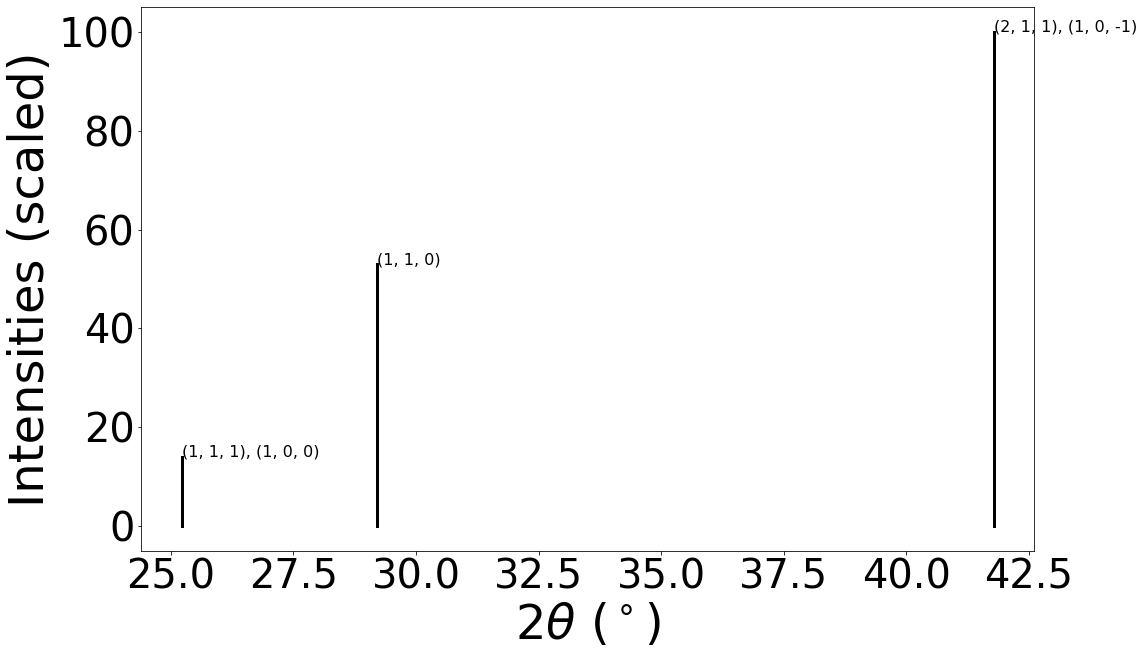

In [10]:
#Diffractogramme pour les 3 premiers pics
xrd.get_plot(structure, two_theta_range=(0,45))